In [1]:
from sklearn.cluster import KMeans as km
import pandas as pd
import folium as fl
from folium.plugins import HeatMapWithTime
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
df = pd.read_excel('Relacao_Roubo_Recup.xlsx')

In [9]:
df.head(1)

,indice,Órgão Registro,Ano,Hora Minuto,Placa,Marca,Município,Data Fato,Nome Rua,Nro,Fato,ano recup,Hora recup,Mun recup,Dt recup,fato,x roubo,y roubo,x recuperacao,y recuperacao
0,0,100310,2005,21:00:00,LYG8322,FIAT/TEMPRA SX,Porto Alegre,2005-07-27,JOAO TELLES,195,ROUBO DE VEICULO,2005,22:00:00,Porto Alegre,2005-07-27,RECUPERACAO DE VEICULO,-51.212353,-30.031055,-51.20878,-30.02914


In [10]:
df.loc[(df.Ano==2019)].shape

(4364, 20)

In [11]:
df1 = df.drop(columns=['indice','Órgão Registro', 'Hora Minuto', 'Placa', 'Data Fato', 'Nome Rua', 'Nro', 'Fato', 'ano recup',
       'Hora recup', 'Mun recup', 'Dt recup', 'fato'])

In [12]:
df1.head(1)

,Ano,Marca,Município,x roubo,y roubo,x recuperacao,y recuperacao
0,2005,FIAT/TEMPRA SX,Porto Alegre,-51.212353,-30.031055,-51.20878,-30.02914


In [13]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 30):
        kmeans = km(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [14]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 30, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [15]:
#somente porto alegre
dfPoa = df1.loc[df1['Município']=='Porto Alegre']
X1 = np.array(dfPoa.drop(['Município','Ano', 'Marca'], axis=1))
len(X1)

31992

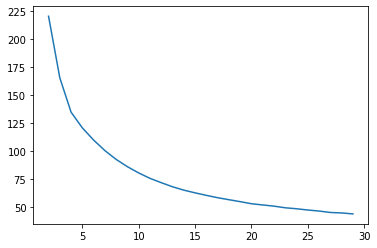

In [16]:
plt.plot(range(2, 30),calculate_wcss(X1))

In [17]:
sum_of_squares = calculate_wcss(X1)

In [18]:
# calculando a quantidade ótima de clusters
n1 = optimal_number_of_clusters(sum_of_squares)
n1

9

In [19]:
# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = km(n_clusters=n1,random_state=0)
clusters = kmeans.fit_predict(X1)

In [20]:
dfPoa['Clusters'] = clusters

C:\Users\lucas-benz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
dfPoa.head(1)

,Ano,Marca,Município,x roubo,y roubo,x recuperacao,y recuperacao,Clusters
0,2005,FIAT/TEMPRA SX,Porto Alegre,-51.212353,-30.031055,-51.20878,-30.02914,0


In [23]:
from folium import plugins

In [24]:
coresMarkers = [['red', 'blue'], 
              ['green','purple'],
              ['orange', 'lightgray'],
              [ 'lightred', 'beige'], 
              ['darkblue', 'darkgreen'], 
              ['cadetblue', 'darkpurple'], 
              ['white','black'], 
              ['pink', 'lightblue'], 
              ['lightgreen','gray']]
grdHm =[['blue','lime','red'],['purple', 'dark', 'red']]


In [26]:
mapaPoa = fl.Map(location=[-30.013360,-51.177189],zoom_start=10)
latlong_ro=[]
latlong_rc=[]

#preenche array com quantidade de clusters que teremos
latlongro=[]
for x in range(n1):
    latlong_ro.append([[x,x]])
    latlong_rc.append([[x,x]])
    
for xro,yro,xrc,yrc,clust in zip(dfPoa['x roubo'],dfPoa['y roubo'],dfPoa['x recuperacao'],dfPoa['y recuperacao'],dfPoa['Clusters']):
    latlong_ro[clust].append([yro, xro])
    latlong_rc[clust].append([yrc, xrc])
    
aux = 0
for z,w in zip(latlong_ro, latlong_rc):
    layRo = 'Roubo' + str(aux)
    layRc = 'Recup.' + str(aux)
    aux= aux +1
    mapaPoa.add_child(plugins.HeatMap(z[1:],name =layRo, radius = 16))                   
    mapaPoa.add_child(plugins.HeatMap(w[1:],name =layRc, radius = 16))
                      
fl.LayerControl().add_to(mapaPoa)                       
mapaPoa
mapaPoa.save('mapa.html')

In [245]:
dfPoa_copy = dfPoa

In [ ]:
dfCP0=dfPoa.loc[dfPoa['Clusters']==0]
dfCP1=dfPoa.loc[dfPoa['Clusters']==1]
dfCP2=dfPoa.loc[dfPoa['Clusters']==2]
dfCP3=dfPoa.loc[dfPoa['Clusters']==3]
dfCP4=dfPoa.loc[dfPoa['Clusters']==4]
dfCP5=dfPoa.loc[dfPoa['Clusters']==5]
dfCP6=dfPoa.loc[dfPoa['Clusters']==6]
dfCP7=dfPoa.loc[dfPoa['Clusters']==7]

In [ ]:
mapa2 = fl.Map(location=[-29.923360,-51.177189],zoom_start=10)
i=0
for xro,yro,xrc,yrc in zip(dfCP0['x roubo'],dfCP0['y roubo'],dfCP0['x recuperacao'],dfCP0['y recuperacao']):
    fl.Marker(location=[yro, xro], icon = fl.Icon(color='green')).add_to(mapa2)
    fl.Marker(location=[yrc, xrc], icon = fl.Icon(color='red')).add_to(mapa2)
    i = i+1
    if i ==1300:
        break
#folium.Marker(location=[-30.048990,-51.215390], icon = folium.Icon(color='green')).add_to(mapa)    
    #folium.Marker(location=[xrc, yrc], icon = folium.Icon(color='green')).add_to(mapa)
#mapa2